<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [189]:
df = pd.read_csv("/content/possum.csv")
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [190]:
df = df.drop("case", axis=1).copy() # Ячейка номеров случаев, не интересует
df

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [191]:
df = df.dropna().copy()
# df.isna()
# Убрал строки 43 и 45 с незаполненным возрастом

In [192]:
# df.isnull()
# Нулевых тоже нет

In [193]:
df["age"] = df["age"].astype("int64")

df["hdlngth"] = df["hdlngth"].astype("float64")
df["skullw"] = df["skullw"].astype("float64")
df["totlngth"] = df["totlngth"].astype("float64")
df["taill"] = df["taill"].astype("float64")
df["footlgth"] = df["footlgth"].astype("float64")
df["earconch"] = df["earconch"].astype("float64")
df["eye"] = df["eye"].astype("float64")
df["chest"] = df["chest"].astype("float64")
df["belly"] = df["belly"].astype("float64")

df["Pop"] = df["Pop"].astype("category")
df["sex"] = df["sex"].astype("category")
df["site"] = df["site"].astype("category") # Будем считать, что зона, в которой обнаружен опосссум - категориальный признак

In [194]:
num_columns = df.select_dtypes(include=["float64"]).columns
cat_columns = df.select_dtypes(include=["category"]).columns
int_columns = df.select_dtypes(include=["int"]).columns

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

**EDA**

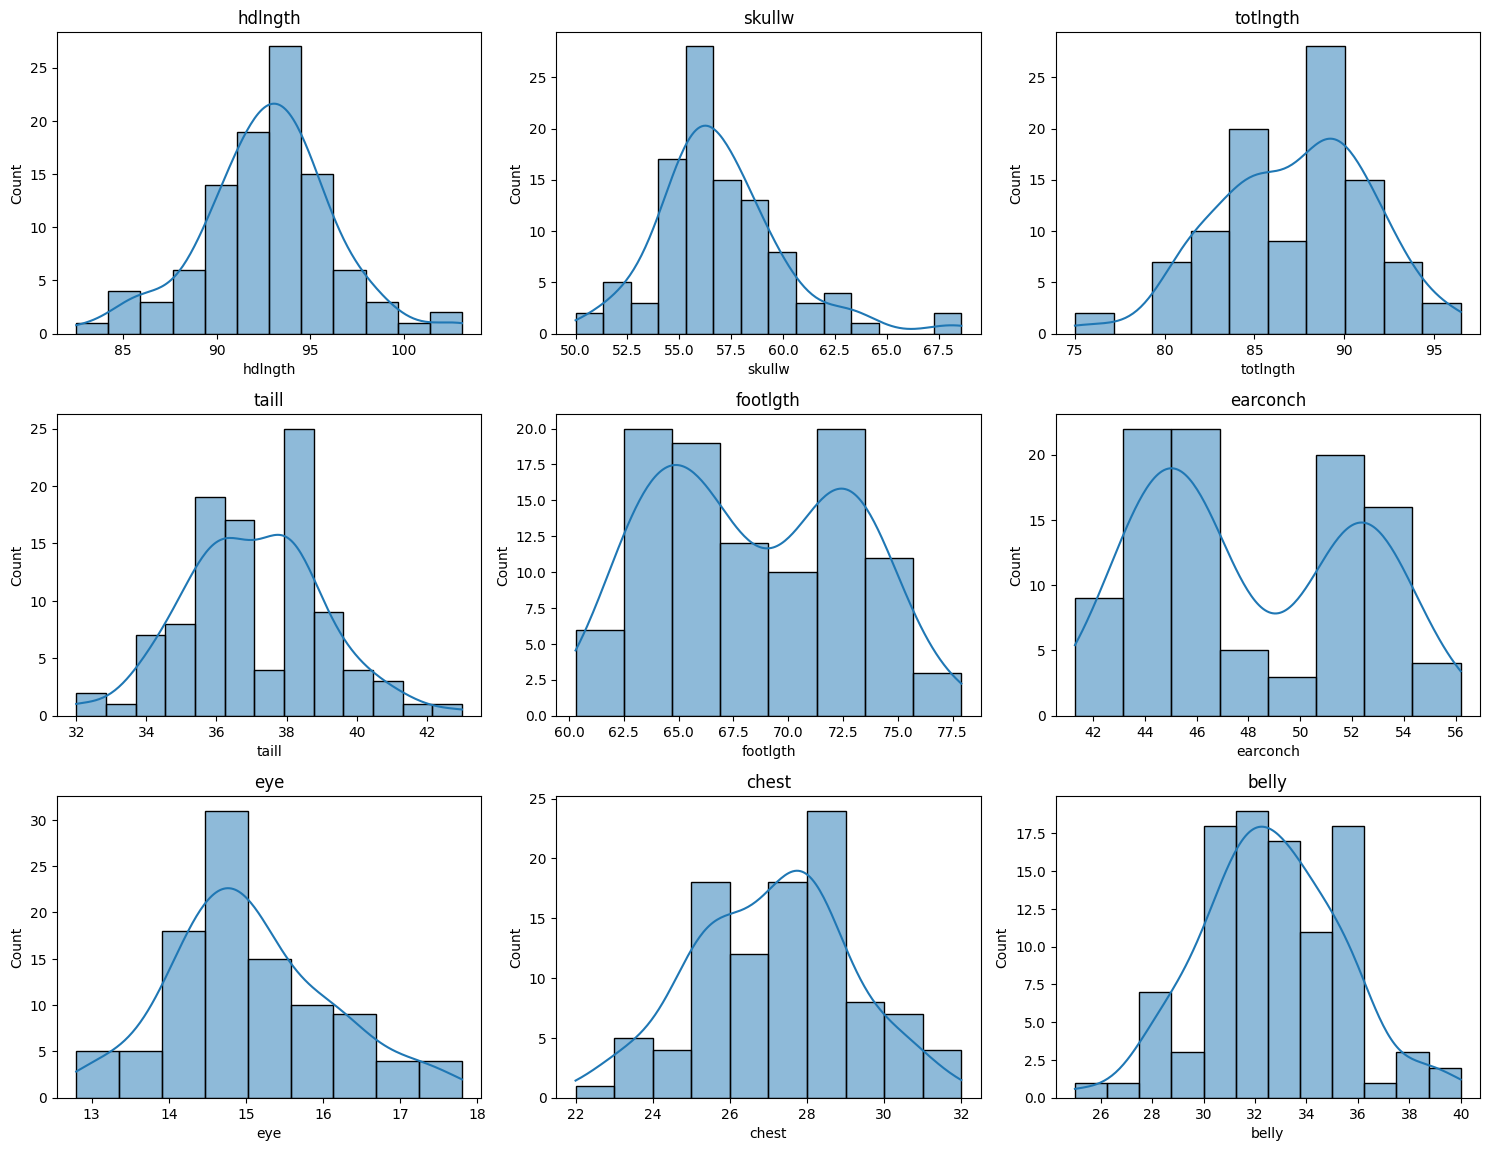

In [195]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(column)

plt.tight_layout()
plt.show()

Hdlngth, eye, chest, age, belly - более-менее нормальное распределение.

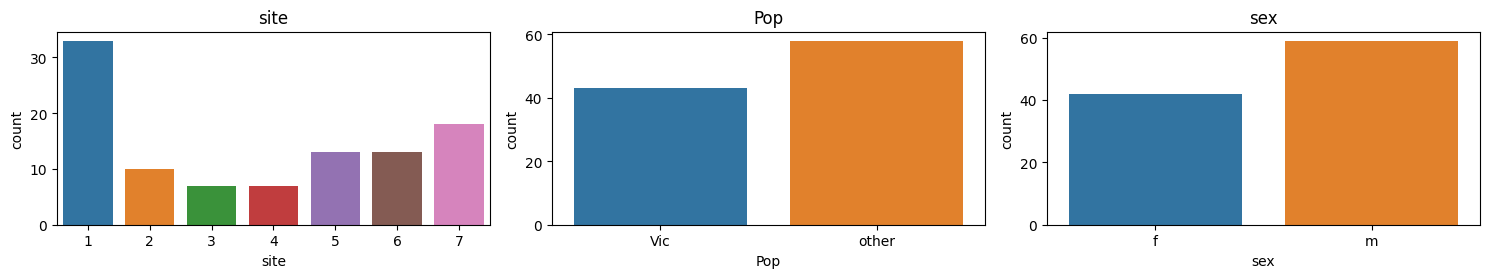

In [196]:
plt.figure(figsize=(15,10))

for i, column in enumerate(cat_columns, 1):
  plt.subplot(4, 3, i)
  sns.countplot(data=df, x=column)
  plt.title(column)

plt.tight_layout()
plt.show()

В первой зоне больше всего опоссумов, походу там зоопарк.

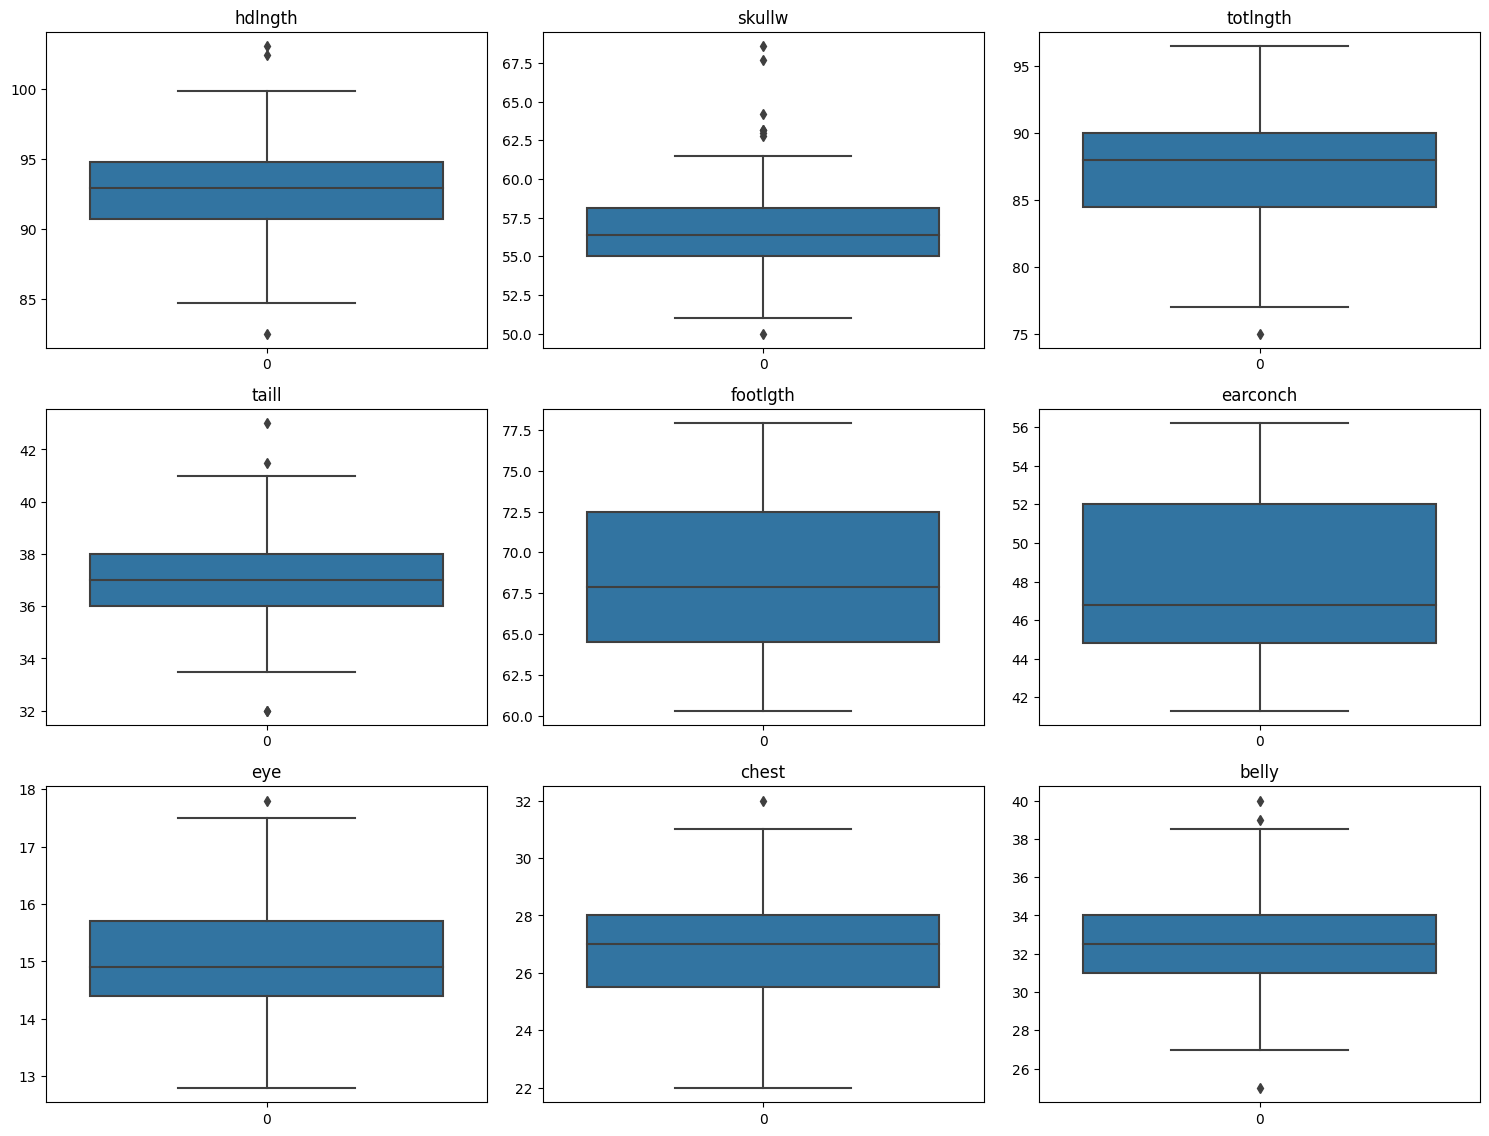

In [197]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

В skullw больше всего аномальных значений

In [198]:
for i, column in enumerate(num_columns, 1):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  df_IQR = df[column].copy()
  df_IQR = df_IQR[(df_IQR > (Q1-1.5*IQR )) & (df_IQR < (Q3+1.5*IQR))]
  df[column] = df_IQR.copy()

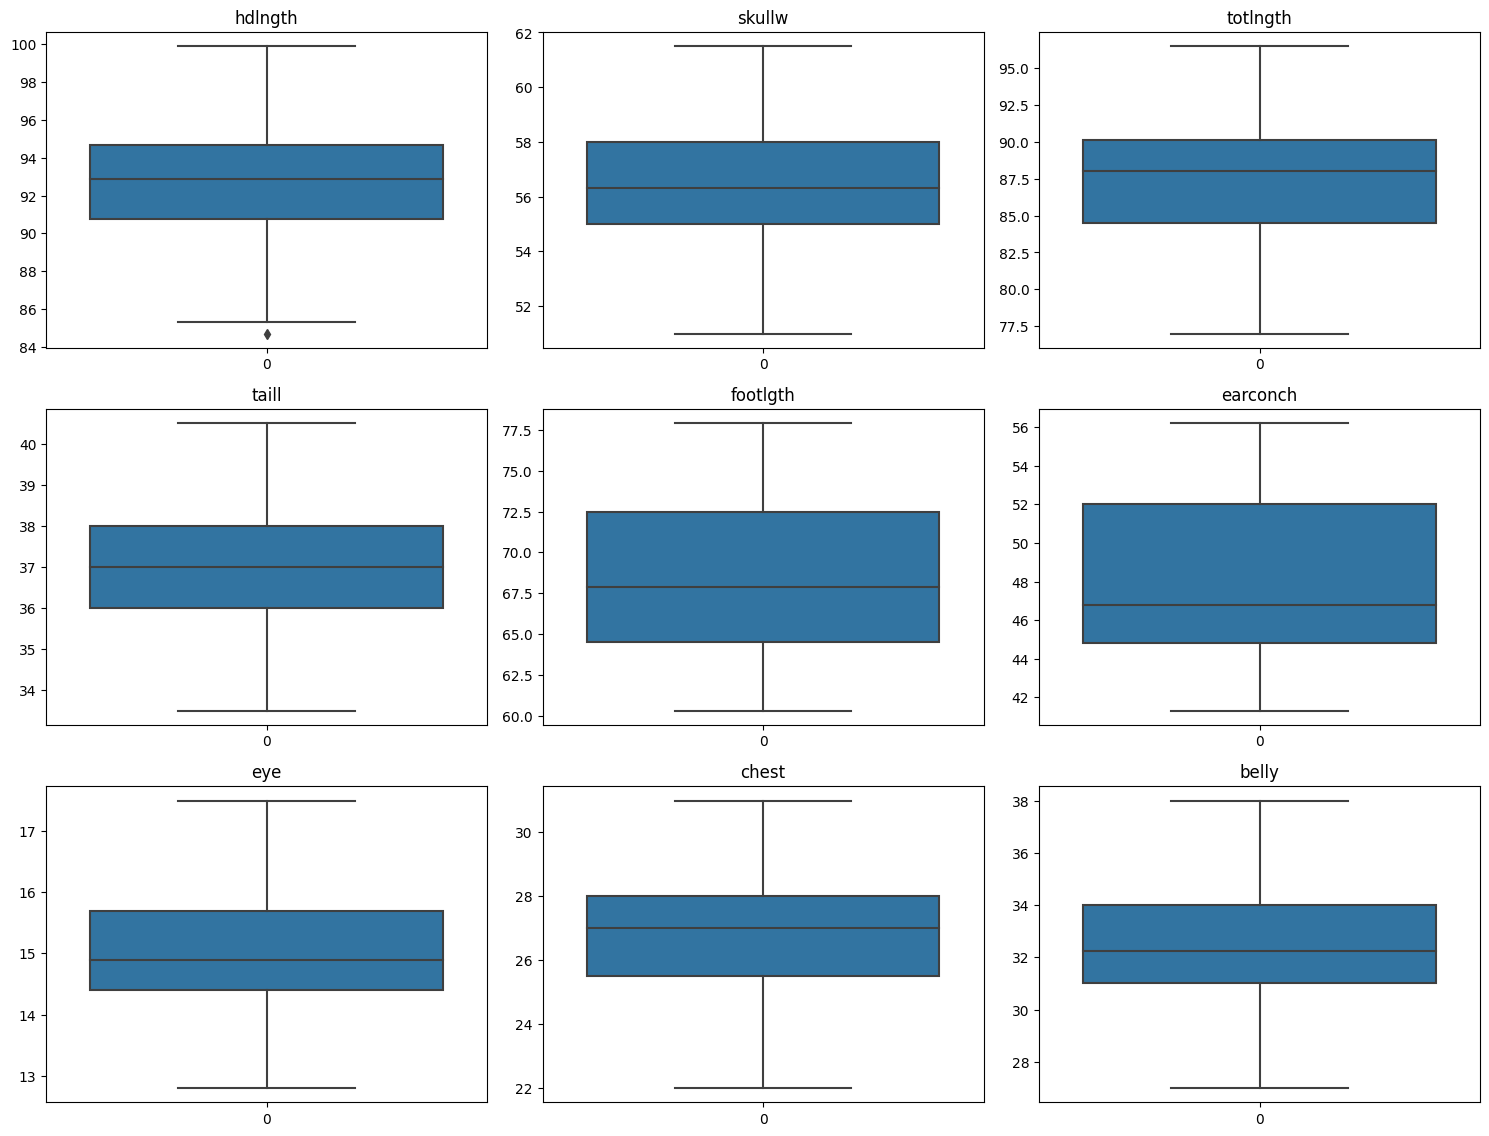

In [199]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
  plt.subplot(4, 3, i)
  sns.boxplot(df[column])
  plt.title(column)

plt.tight_layout()
plt.show()

Выбросы отчищены

**За целевую переменную возьмем Age**

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [200]:
standard_scaler = StandardScaler()

st_scaled = df.copy()
st_scaled[num_columns] = standard_scaler.fit_transform(df[num_columns])
df[num_columns] = st_scaled[num_columns].copy()

In [201]:
encoder = OneHotEncoder()

for i, column in enumerate(cat_columns, 1):
  transformed = encoder.fit_transform(df[[column]])
  df[encoder.categories_[0]] = transformed.toarray()
df = df.drop(columns=cat_columns).copy()
df = df.rename(columns={1: "site_1", 2: "site_2", 3: "site_3", 4: "site_4",
                        5: "site_5", 6: "site_6", 7: "site_7", "Vic": "Vic_population",
                        "other": "other_population", "f": "sex_female", "m": "sex_male"}).copy()
                        # Пофикшены некрасивости работы энкодера
df

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,...,site_2,site_3,site_4,site_5,site_6,site_7,Vic_population,other_population,sex_female,sex_male
0,8,0.477447,1.816300,0.400840,-0.592994,1.389467,1.575748,0.173199,0.502834,1.525392,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,6,-0.042079,0.527217,1.024037,-0.285156,0.934052,0.758956,0.956020,0.758080,0.235193,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,6,0.444977,1.632145,2.021151,1.254037,1.594404,0.932215,0.466757,1.523817,0.665259,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,6,0.185214,0.297024,1.148676,0.638360,1.753799,1.006469,0.173199,0.502834,0.665259,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2,-0.366783,-0.071286,-0.471635,-0.592994,0.592490,1.253981,0.075347,0.758080,0.235193,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,-1.016190,-0.209402,-1.468750,-0.285156,-0.546047,-0.330098,-0.218211,-2.049623,-2.345206,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
100,1,-1.308424,-0.807905,-1.219471,1.254037,-0.910379,-0.033083,-1.001033,-1.028640,0.235193,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
101,6,-0.074549,-0.669789,0.400840,0.638360,-1.115316,-0.676616,-1.979559,-1.028640,-1.055007,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
102,4,-0.366783,-0.577711,-1.219471,-0.285156,-1.251941,-0.552859,0.368904,-1.028640,-1.485073,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [202]:
"""
Код здесь
"""

'\nКод здесь\n'

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [203]:
"""
Код здесь
"""

'\nКод здесь\n'

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [204]:
"""
Результат работы
"""

'\nРезультат работы\n'